# Gym Environment Example
Basic run of a gym environment to collect and plot traces.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gym

# Disable scientific printing
np.set_printoptions(threshold=10000, suppress=True, precision=5, linewidth=180)

env = gym.make('CartPole-v1')
print("Observation:")
print(env.observation_space)
print("Action:")
print(env.action_space)

ep_obs = list()

for k in range(2):
  obs = list()
  observation: np.ndarray = env.reset()
  obs.append(observation)
  for t in range(100):
    # env.render()
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    obs.append(observation)
    if done:
      print(f"Episode {k} finished after {t+1} timesteps")
      break
  # Curate episode observations
  obs = pd.DataFrame(obs, columns=['Cart Position', 'Cart Velocity', 'Pole Angle', 'Pole Tip Vel'])
  obs['Episode'] = k
  obs['Time Step'] = np.arange(len(obs))
  ep_obs.append(obs)
env.close()

ep_obs = pd.concat(ep_obs)
ep_obs.sample(5)

Observation:
Box(4,)
Action:
Discrete(2)
Episode 0 finished after 19 timesteps
Episode 1 finished after 19 timesteps


,Cart Position,Cart Velocity,Pole Angle,Pole Tip Vel,Episode,Time Step
9,0.082302,0.176452,-0.099368,-0.290622,0,9
17,0.127044,0.191254,-0.189728,-0.626328,0,17
16,0.119371,0.383659,-0.172525,-0.860181,0,16
12,-0.002597,-0.769622,0.004373,1.121342,1,12
9,0.020198,-0.185178,-0.028498,0.263710,1,9


In [2]:
melted_ep = pd.melt(ep_obs, id_vars=['Episode', 'Time Step'],
                 value_vars=['Cart Position', 'Cart Velocity', 'Pole Angle', 'Pole Tip Vel'],
                 var_name='Observation',
                 value_name='Value')
melted_ep['Type'] = np.where(melted_op['Observation'])
melted_ep.sample(5)

,Episode,Time Step,Observation,Value
116,1,16,Pole Angle,0.118260
52,0,12,Cart Velocity,0.375911
38,1,18,Cart Position,-0.130207
98,0,18,Pole Angle,-0.202255
23,1,3,Cart Position,0.015254


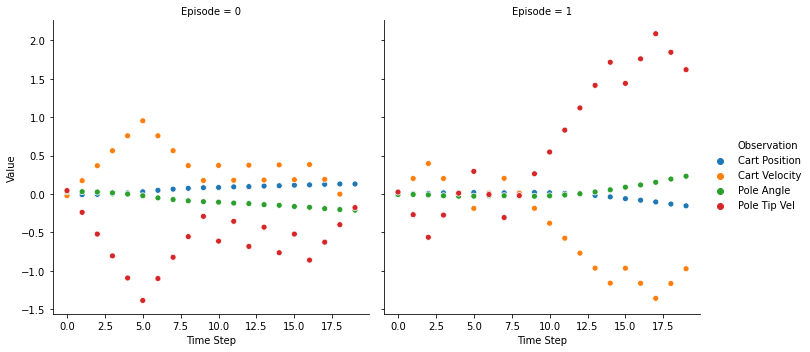

In [3]:
g = sns.relplot(x='Time Step', y='Value', hue='Observation', col='Episode', data=melted_ep)
g.savefig("example_plot.pdf", bbox_inches='tight')

In [8]:
melted_ep['Observation'].map()

0      Cart Position
1      Cart Position
2      Cart Position
3      Cart Position
4      Cart Position
           ...      
155     Pole Tip Vel
156     Pole Tip Vel
157     Pole Tip Vel
158     Pole Tip Vel
159     Pole Tip Vel
Name: Observation, Length: 160, dtype: object